<a href="https://colab.research.google.com/github/seohyun34/test/blob/main/mid_term_sol_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term exam on Deep Learning for AI

- Name:  
- ID Number:  

------------------------------------------
Firstly, copy this notebook to your google drive.  
Secondly, click 'Runtime' tab, 'Change runtime type' tab, and change 'Hardware accelerator' as 'GPU.'  
Now you are ready to go, good luck! :)


In [ ]:
import tensorflow as tf


## Q1 Mnist data

We will use Mnist dataset.

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### (Q1-1) [15 points] Check your data and design your neural network model
  - [5] Check dimension of inputs (train_images) and targets (train_labels) for training.
  - [5] Reshape the train_images and test_images data, the 2nd and 3rd dimension should be flattened. ( (28,28) dimension becomes 784 )
  - [5] Divide train_images and test_images by 255, so that the data ranges between 0 and 1.  

In [ ]:
## Code here
train_images.shape

(60000, 28, 28)

In [ ]:
## Code here
train_labels.shape

(60000,)

In [ ]:
# Code here

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
train_images.shape

(60000, 784)

#### (Q1-2) [10 points] Design a simple neural network model using three dense layers.
  - Two hidden dense layers have dimension of 50 and 30 with a relu activation.
  - Define final dense layer with the proper activation for multi-class outputs.
  - Build your model and check summary output. Summary output should look like below.
  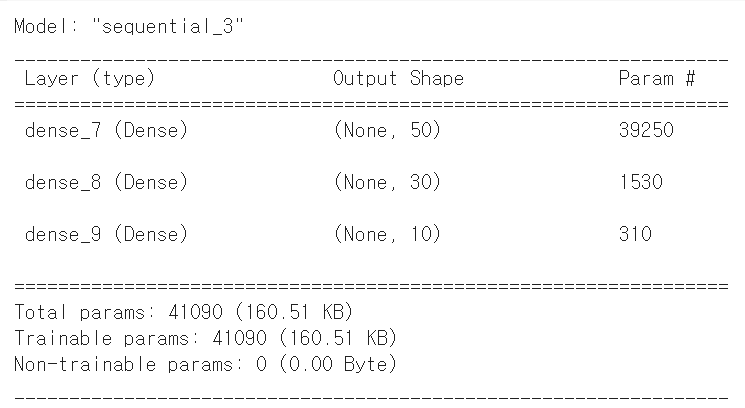

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(50, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
model.build((None,784))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,090 (160.51 KB)

 Trainable params: 41,090 (160.51 KB)

 Non-trainable params: 0 (0.00 B)

#### (Q1-3) [10 points] Compile and fit your model.
 - [5] Set optimizer as 'SGD', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 8 number of epochs with batch size 50. Specify validation data as (test_images, test, labels)

In [ ]:

model.compile(  # Code here
              optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [ ]:

history = model.fit(  # Code here
                    train_images,
                    train_labels,
                    epochs=8,
                    batch_size=50,
                    validation_data=(test_images, test_labels))


Epoch 1/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5541 - loss: 1.4460 - val_accuracy: 0.8871 - val_loss: 0.4009
Epoch 2/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8895 - loss: 0.3893 - val_accuracy: 0.9096 - val_loss: 0.3138
Epoch 3/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9098 - loss: 0.3122 - val_accuracy: 0.9216 - val_loss: 0.2763
Epoch 4/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9220 - loss: 0.2717 - val_accuracy: 0.9292 - val_loss: 0.2502
Epoch 5/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9290 - loss: 0.2443 - val_accuracy: 0.9338 - val_loss: 0.2318
Epoch 6/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9361 - loss: 0.2232 - val_accuracy: 0.9394 - val_loss: 0.2121
Epoch 7/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9398 - loss: 0.2104 - val_accuracy: 0.9424 - val_loss: 0.2017
Epoch 8/8
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9427 - loss: 0.1993 - val_accu

## Q2 Youtube reply data. Create spam detection model

It is a public set of comments collected for spam research. It has five datasets composed by 1,956 real messages extracted from five videos that were among the 10 most viewed on the collection period.


We would like to develop a binary classification model (Spam detection model).

Here are some codes to prepare data

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
youtube_spam_collection = fetch_ucirepo(id=380)

# data (as pandas dataframes)
X = youtube_spam_collection.data.features.copy()
y = youtube_spam_collection.data.targets.copy()


In [ ]:
# Some preprocessing

import re
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'http\S+', ' http', x))    ## replace http something -> http
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: re.sub(r'\S+.?\S+.\S[3]', ' http', x))    ## replace xxx.xxx.xxx -> http
X.iloc[:, 2] = X.iloc[:, 2].apply(lambda x: re.sub(r'(\\|%|\[|\]|!|\?|#|&)\S+', ' ---', x)) ## words starting with \, %, [, ], !, & or ? -> '---'
X.iloc[:,2] = X.iloc[:,2].apply(lambda x: x.lower())


In [ ]:
import numpy as np
np.random.seed(1)

idx = np.arange(len(y))
np.random.shuffle(idx)

X_shuffled = X.iloc[idx, 2]
y_shuffled = y.iloc[idx]

In [ ]:
idx[:5]

array([1778, 1936, 1928, 1102, 1729])

Check first 10 sampels

In [ ]:
## Targets

X_shuffled[:10]

,CONTENT
1778,stop wasting up your time and get paid to mes...
1936,love this song ---
1928,"hello everyone, it is not my intention to spam..."
1102,check out this funny video --- box knocks out...
1729,....i stil lisening this :)﻿
891,this is so http9;t i heard this before ---
1586,nice song﻿
406,"i love this song, it´s for empowering every wo..."
177,http
887,check out this video on youtube:﻿


In [ ]:
## Labels, 0: normal, 1:spam

y_shuffled[:10]

,CLASS
1778,1
1936,0
1928,1
1102,1
1729,0
891,0
1586,0
406,0
177,1
887,1


In [ ]:
## Count words so that we use most frequent words to use Bag of Words feature.

word_counts = {}
for row in X_shuffled:
    for word in row.split():
        word_counts[word] = word_counts.get(word, 0) + 1

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

sorted_words = [word for word, count in sorted_word_counts.items() if count >= 10]


In [ ]:
word_index = dict( [  (str1, i) for i, str1 in enumerate(sorted_words) ] )
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

Split data as train, validation and test sets

In [ ]:
X_train = X_shuffled[:1000]
y_train = y_shuffled[:1000]

X_val = X_shuffled[1000:1500]
y_val = y_shuffled[1000:1500]

X_test = X_shuffled[1500:]
y_test = y_shuffled[1500:]

#### (Q2-1) [10 points] Make a vectorize_sequences function just like chapter 4.
 - `sorted_words` is a list of most frequent words used in the reply. `word_index` and `reverse_word_index` are index to word or word to index mapping information for the words.
 - Input is sequences like X_train, X_val and X_test.
 - Modify the code below.

Codes from chapter 4 is below for your referecne. You have to modify the below function. Be careful, this time input is words not integers. You have to modify accordingly.

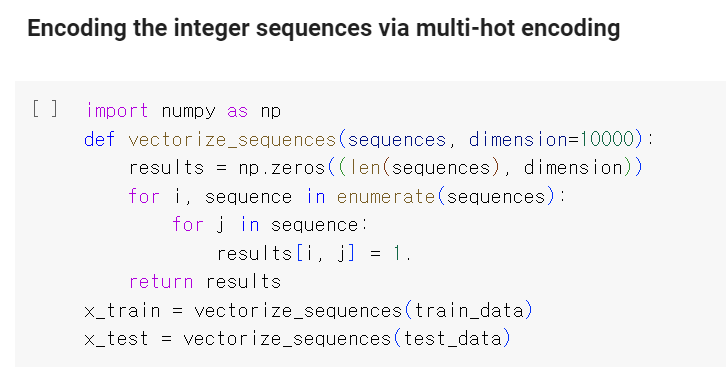

In [ ]:
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            try :
              ### Modify this part
              results[i, word_index[j]] = 1.
            except :
              pass
    return results



In [ ]:
##

x4train = vectorize_sequences(X_train, dimension= len(sorted_words))
x4val = vectorize_sequences(X_val, dimension= len(sorted_words))
x4test = vectorize_sequences(X_test, dimension= len(sorted_words))

If you wrote the code correctly, the first output result of the training set will be as follows.

In [ ]:
x4train[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### (Q2-2) [10 points] Design a simple neural network model using four dense layers.
  - Try to use Functional API of keras, not sequential one.
  - Three hidden dense layers have dimension of 36, 20 and 10 with a relu activation.
  - Define final dense layer with the proper activation for binary classification output.


If you cannot solve problem Q2-1, run the code below to receive the preprocessed data and then solve the problem.

In [ ]:
!gdown 1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH

Downloading...
From: https://drive.google.com/uc?id=1ne1COVEoKPOPBWQAbrL1NjTGzVJXWUFH
To: /content/record1.pkl
100% 6.03M/6.03M [00:00<00:00, 101MB/s]


In [ ]:
import pickle

with open('record1.pkl', 'rb') as f:
  record1 = pickle.load(f)
  x4train, x4val, x4test, y_train, y_val, y_test, idx = record1


In [ ]:
## your code here
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dense(20, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:

from tensorflow.keras.layers import Input, Dense

# Define the input layer
inputs = Input(shape=(len(word_index),))

# Define the hidden layers
dense1 = Dense(36, activation="relu")(inputs)
dense2 = Dense(20, activation="relu")(dense1)
dense3 = Dense(10, activation="relu")(dense2)

# Define the output layer
outputs = Dense(1, activation="sigmoid")(dense3)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)


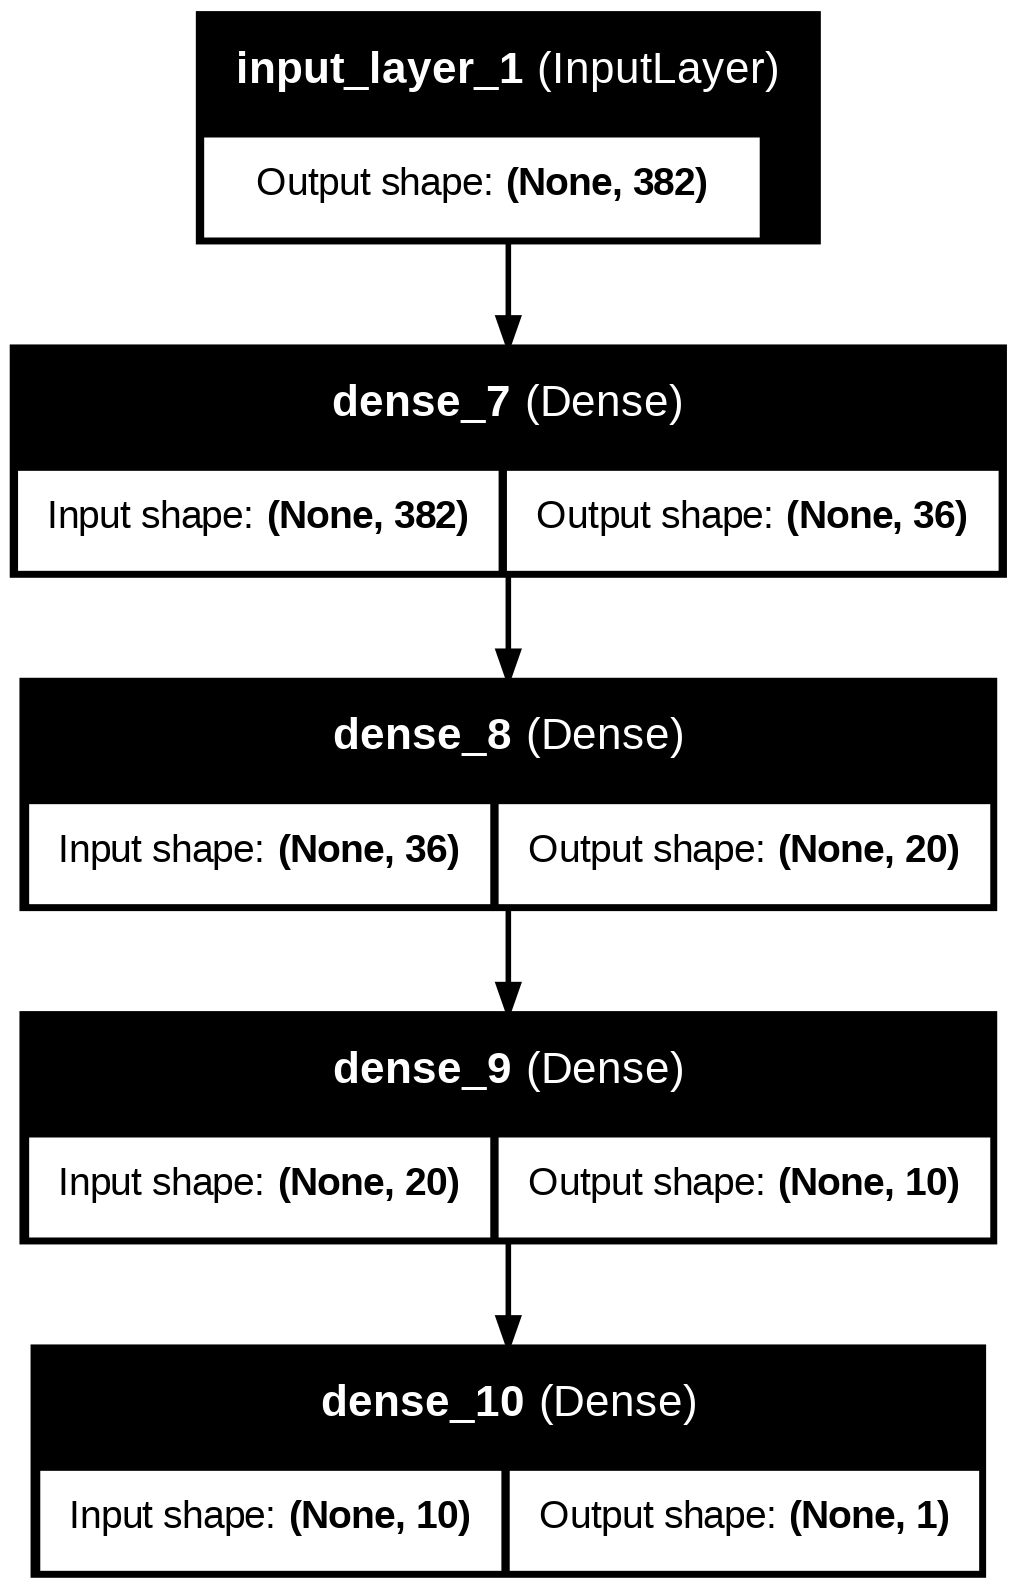

In [ ]:
keras.utils.plot_model(model, "spam_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)

#### (Q2-3) [15 points] Compile and fit your model.
 - [5] Set optimizer as 'rmsprop', Set proper loss and set evaluation metric as 'accuracy'
 - [5] Fit your model using 50 number of epochs with batch size 20. Specify validation data as (x4val, y_val)
 - [5] Evaluate your model using X4test and y_test. Report evaluation accuracy for test dataset.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(x4train,
                    y_train,
                    epochs=50,
                    batch_size=20,
                    validation_data=(x4val, y_val))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5285 - loss: 0.6875 - val_accuracy: 0.7040 - val_loss: 0.6442
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6983 - loss: 0.6261 - val_accuracy: 0.7580 - val_loss: 0.5782
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.5502 - val_accuracy: 0.7420 - val_loss: 0.5390
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 0.4983 - val_accuracy: 0.7640 - val_loss: 0.5206
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7694 - loss: 0.4830 - val_accuracy: 0.7380 - val_loss: 0.5320
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7601 - loss: 0.4900 - val_accuracy: 0.7560 - val_loss: 0.5159
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7892 - loss: 0.4647 - val_accuracy: 0.7580 - val_loss: 0.5152
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7747 - loss: 0.4668 - val_accuracy: 0.7600 - val_loss

In [ ]:
results = model.evaluate(x4test, y_test)
print(results)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8036 - loss: 0.4368
[0.4512309730052948, 0.7960526347160339]


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

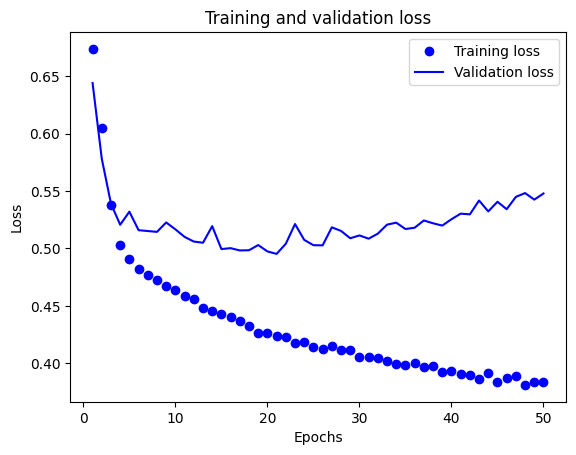

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

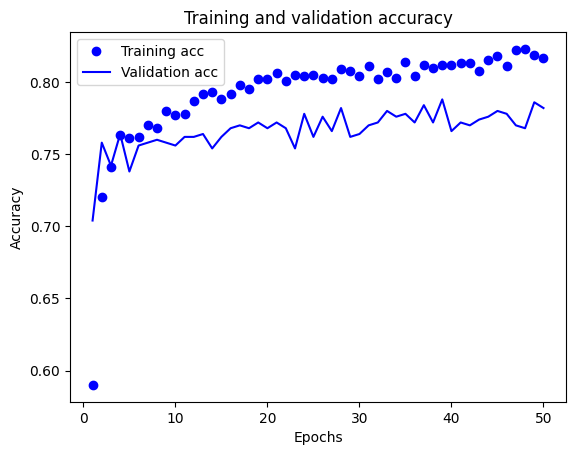

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
results = model.evaluate(x4test, y_test)
print(results)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8036 - loss: 0.4368 
[0.4512309730052948, 0.7960526347160339]


#### (Q2-3) [10 points] Revise your network and retrain using Callbacks.
 - [5] Try to use Dropout(0.5) layers after three hidden dense layers.
 - [5] Use Early Stopping callback with patience parameter 2 monitoring validation loss, and use ModelCheckpoint callbact to save the bese model based on validation loss

In [ ]:
model = keras.Sequential([
    layers.Dense(36, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])


In [ ]:

callbacks = [
    keras.callbacks.EarlyStopping(patience=7, monitor='val_loss'),
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x4train,
                    y_train,
                    epochs=50,
                    batch_size=20,
                    validation_data=(x4val, y_val),
                    callbacks=callbacks)


Epoch 1/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5019 - loss: 0.7005

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5048 - loss: 0.6997 - val_accuracy: 0.5960 - val_loss: 0.6756
Epoch 2/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5443 - loss: 0.6854

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5466 - loss: 0.6844 - val_accuracy: 0.6480 - val_loss: 0.6618
Epoch 3/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5833 - loss: 0.6671

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5848 - loss: 0.6667 - val_accuracy: 0.6740 - val_loss: 0.6485
Epoch 4/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6174 - loss: 0.6482

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6170 - loss: 0.6488 - val_accuracy: 0.6980 - val_loss: 0.6347
Epoch 5/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6326 - loss: 0.6433

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6334 - loss: 0.6427 - val_accuracy: 0.7320 - val_loss: 0.6228
Epoch 6/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6324 - loss: 0.6296

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6353 - loss: 0.6293 - val_accuracy: 0.7380 - val_loss: 0.6077
Epoch 7/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.6144

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6620 - loss: 0.6144 - val_accuracy: 0.7500 - val_loss: 0.5956
Epoch 8/50
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6758 - loss: 0.6172

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.6182 - val_accuracy: 0.7520 - val_loss: 0.5898
Epoch 9/50
48/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6756 - loss: 0.6254

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6753 - loss: 0.6251 - val_accuracy: 0.7360 - val_loss: 0.5807
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7111 - loss: 0.5876 - val_accuracy: 0.7240 - val_loss: 0.5837
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.6297

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6564 - loss: 0.6293 - val_accuracy: 0.7400 - val_loss: 0.5653
Epoch 12/50
49/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7330 - loss: 0.5873

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7325 - loss: 0.5870 - val_accuracy: 0.7320 - val_loss: 0.5581
Epoch 13/50
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.5708

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7204 - loss: 0.5717 - val_accuracy: 0.7440 - val_loss: 0.5578
Epoch 14/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7218 - loss: 0.5703

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7209 - loss: 0.5713 - val_accuracy: 0.7440 - val_loss: 0.5504
Epoch 15/50
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7288 - loss: 0.5686

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7284 - loss: 0.5688 - val_accuracy: 0.7320 - val_loss: 0.5496
Epoch 16/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7417 - loss: 0.5501

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7383 - loss: 0.5524 - val_accuracy: 0.7520 - val_loss: 0.5478
Epoch 17/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7215 - loss: 0.5634

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7218 - loss: 0.5630 - val_accuracy: 0.7560 - val_loss: 0.5419
Epoch 18/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7217 - loss: 0.5786 - val_accuracy: 0.7500 - val_loss: 0.5421
Epoch 19/50
45/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7167 - loss: 0.5738

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7164 - loss: 0.5727 - val_accuracy: 0.7540 - val_loss: 0.5417
Epoch 20/50
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7147 - loss: 0.5715

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7154 - loss: 0.5705 - val_accuracy: 0.7420 - val_loss: 0.5400
Epoch 21/50
41/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7159 - loss: 0.5594

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7188 - loss: 0.5603 - val_accuracy: 0.7560 - val_loss: 0.5343
Epoch 22/50
39/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7421 - loss: 0.5433

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7384 - loss: 0.5467 - val_accuracy: 0.7540 - val_loss: 0.5334
Epoch 23/50
43/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7301 - loss: 0.5112

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7322 - loss: 0.5143 - val_accuracy: 0.7540 - val_loss: 0.5301
Epoch 24/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7489 - loss: 0.5202 - val_accuracy: 0.7540 - val_loss: 0.5323
Epoch 25/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7119 - loss: 0.5568 - val_accuracy: 0.7400 - val_loss: 0.5326
Epoch 26/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7469 - loss: 0.5261 - val_accuracy: 0.7480 - val_loss: 0.5339
Epoch 27/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7636 - loss: 0.5428 - val_accuracy: 0.7540 - val_loss: 0.5329
Epoch 28/50
38/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.5188

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7601 - loss: 0.5234 - val_accuracy: 0.7560 - val_loss: 0.5266
Epoch 29/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7691 - loss: 0.5056 - val_accuracy: 0.7580 - val_loss: 0.5302
Epoch 30/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7311 - loss: 0.5557 - val_accuracy: 0.7560 - val_loss: 0.5323
Epoch 31/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7592 - loss: 0.5316 - val_accuracy: 0.7500 - val_loss: 0.5361
Epoch 32/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7555 - loss: 0.5083 - val_accuracy: 0.7640 - val_loss: 0.5332
Epoch 33/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7369 - loss: 0.5162 - val_accuracy: 0.7620 - val_loss: 0.5313
Epoch 34/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7224 - loss: 0.5466 - val_accuracy: 0.7660 - val_loss: 0.5279
Epoch 35/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7249 - loss: 0.5403 - val_accuracy: 0.7640 - val_loss: 

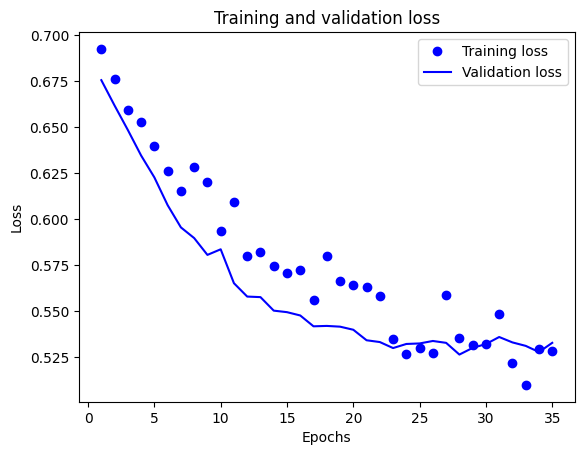

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

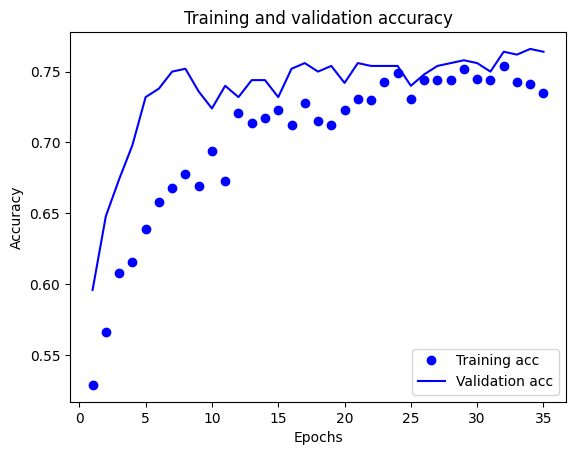

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (Q2-4) [5 points] Load the saved best model and evaluate the model on test data.

In [ ]:
best_model = keras.models.load_model('best_model.h5')
results = best_model.evaluate(x4test, y_test)
print(results)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7795 - loss: 0.5041
[0.5100454092025757, 0.7741228342056274]


#### (Q2-4) [10 points] Consider additional input feature, wold length feature. Make a multi-input model.
  - we can calculate wordlength feature using the code below
  - Using the multi-hot encoded reply_input feature(X4train, X4val, X4test) and wordlength feature (wordlength_train, wordlength_val, wordlength_test), try to make a multi-input model like below.

  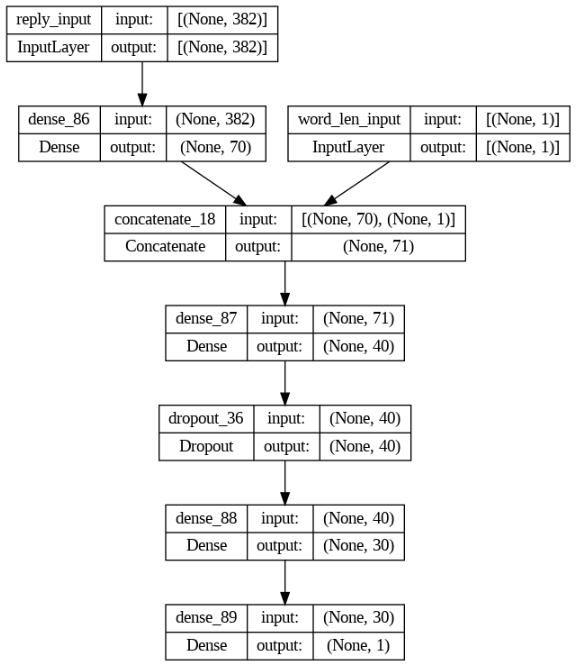
   

In [ ]:
X_ori = youtube_spam_collection.data.features.iloc[idx,2]
chrlength_text = np.array([ len(X_ori[i]) for i in range(len(X_ori)) ])
max_len = chrlength_text.max()

chrlength_train = chrlength_text[:1000]/max_len
chrlength_val = chrlength_text[1000:1500]/max_len
chrlength_test = chrlength_text[1500:]/max_len


In [ ]:

reply_input = keras.Input(shape=(len(word_index),), name="reply_input")
word_len_input = keras.Input(shape=(1,), name="word_len_input")

dense1 = layers.Dense(70, activation="relu")(reply_input)

merged = layers.Concatenate()([dense1, word_len_input])

dense2 = layers.Dense(40, activation="relu")(merged)
dr1 = layers.Dropout(0.5)(dense2)

dense3 = layers.Dense(30, activation="relu")(dr1)
dr2 = layers.Dropout(0.5)(dense3)
output = layers.Dense(1, activation="sigmoid")(dense3)

model = keras.Model(inputs=[reply_input, word_len_input], outputs=[output])


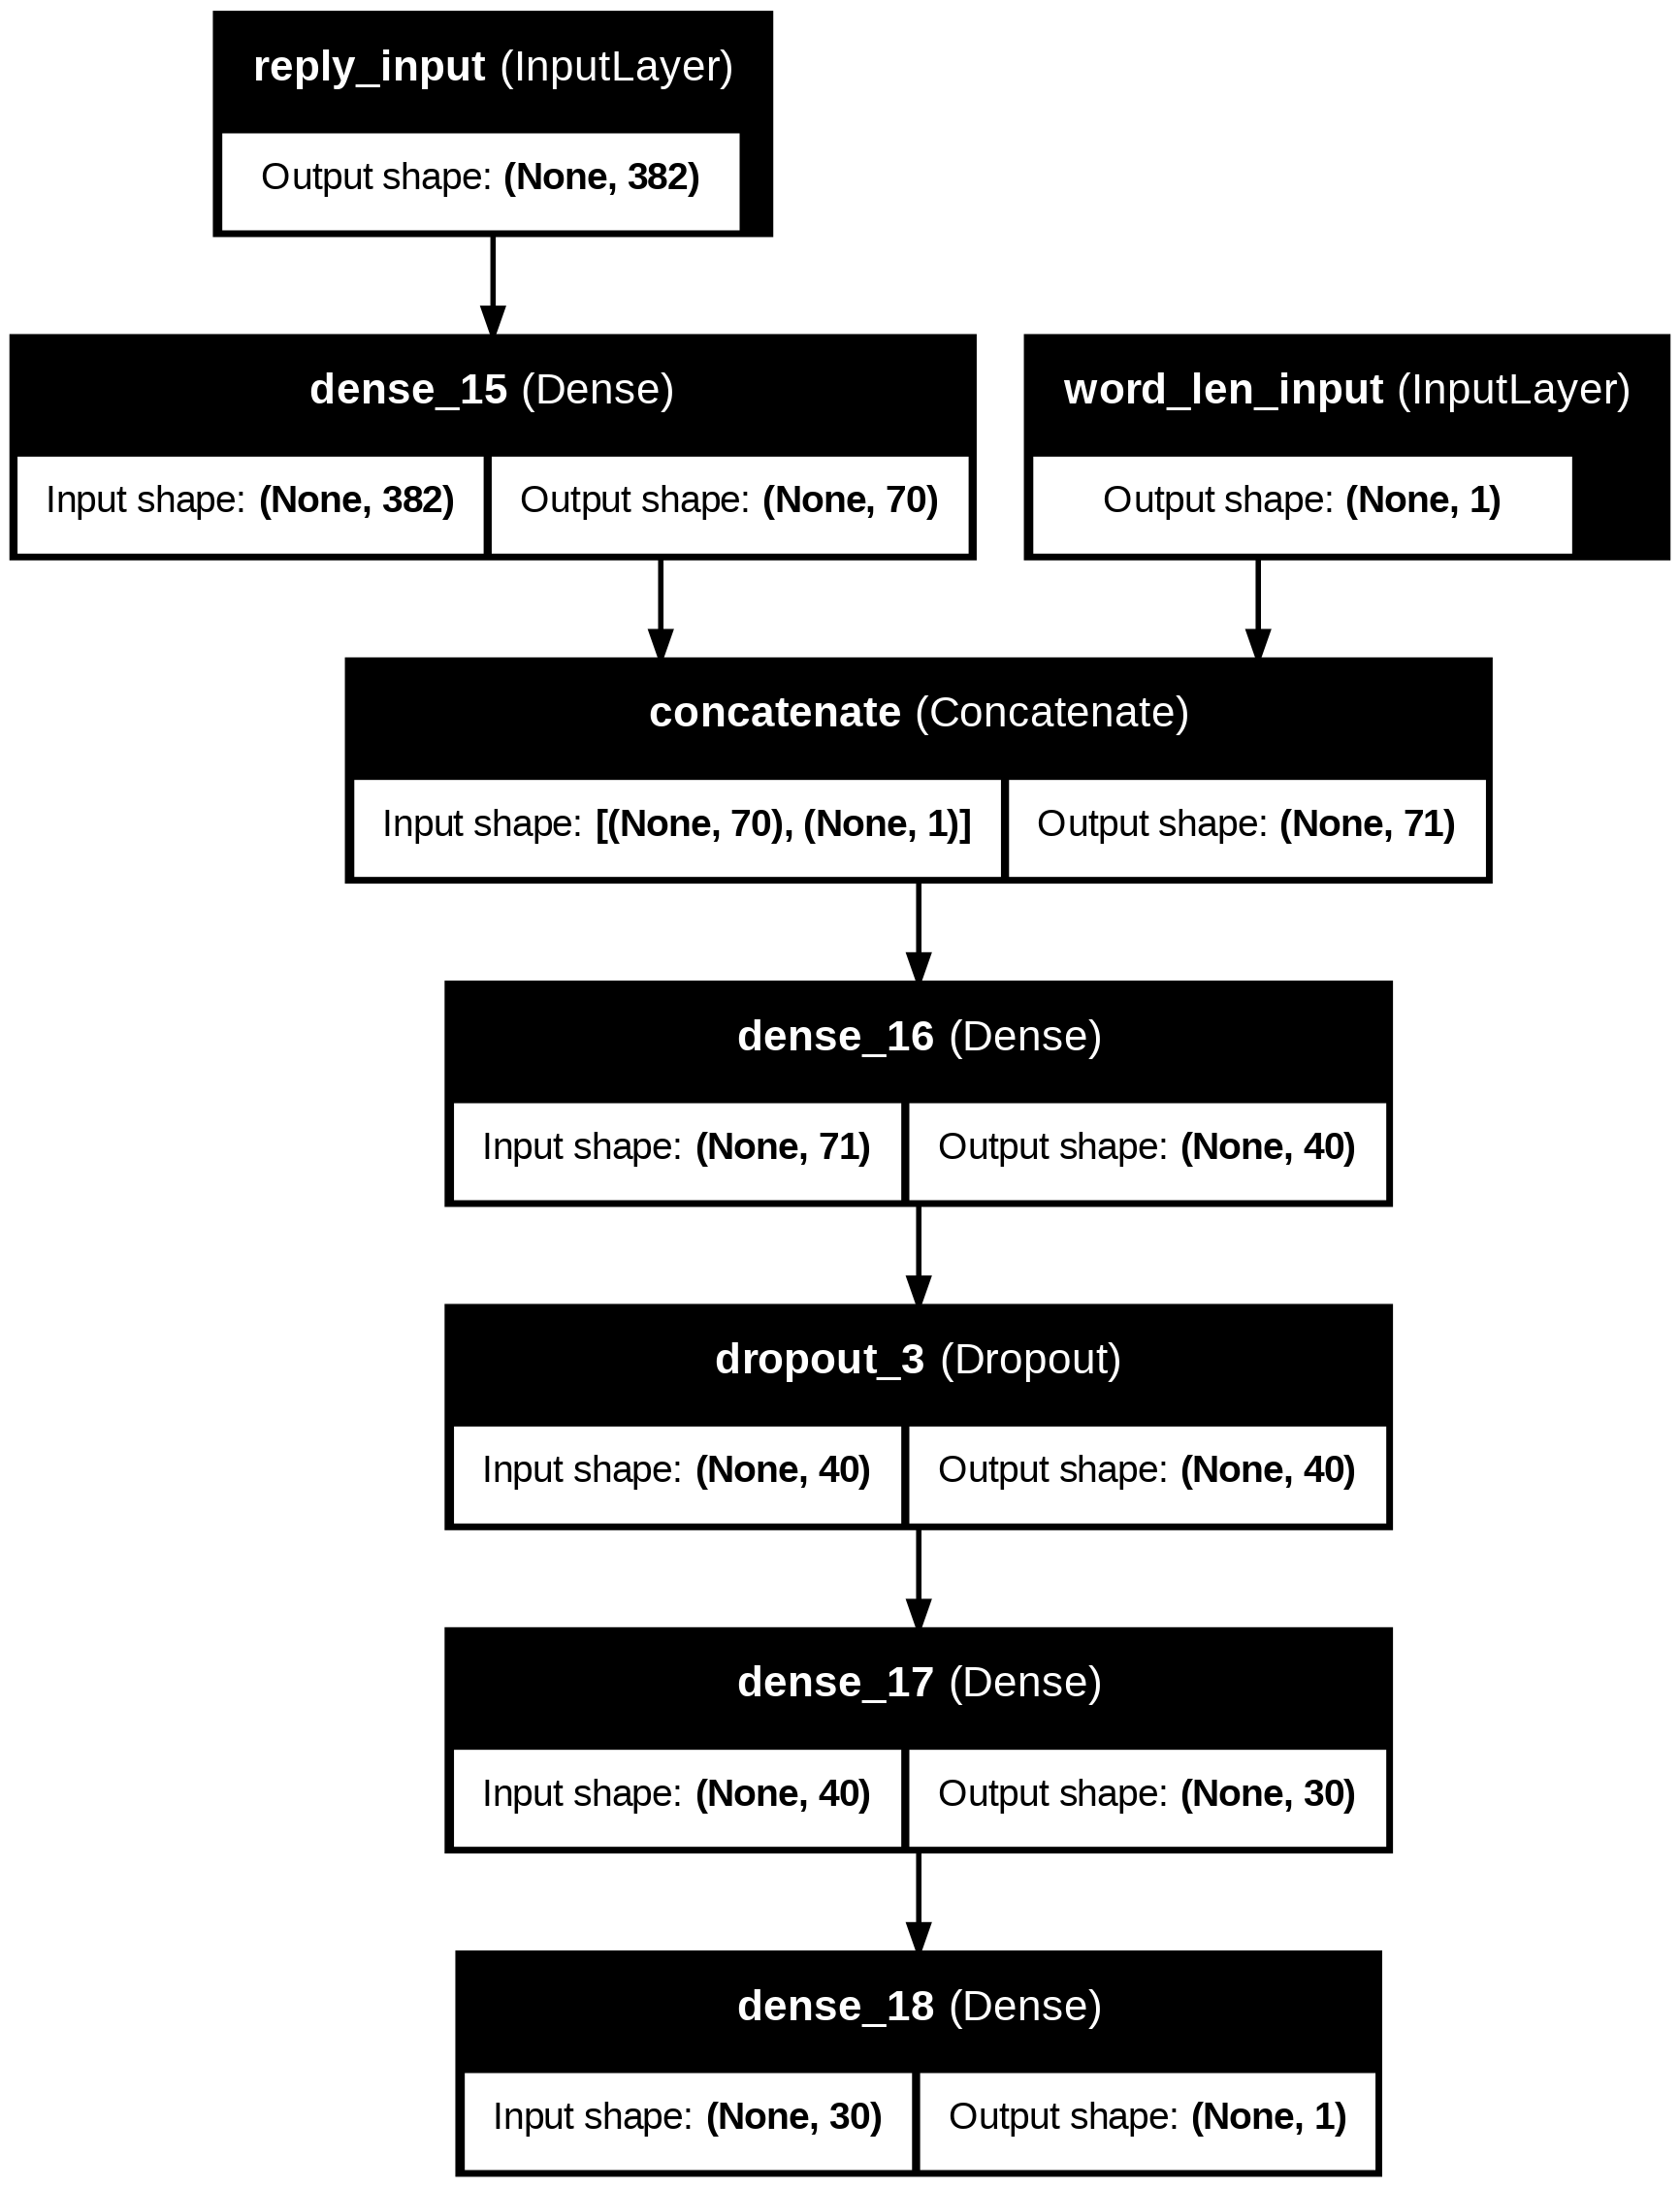

In [ ]:
keras.utils.plot_model(model, "spam_classifier_with_shape_info.png", show_shapes=True, show_layer_names=True)

#### (Q2-5) [5 points] Train and evaluate multi-input model
  - For compile, use RMSprop, specify metrics as accuracy. Use ModelCheckpoint callback saving a best model based on validation loss.
  - For training, train 100 number of epochs, using batch size 20. Use x4val, chrlength_val, and y_val for your validation data.
  - Finally, evaluate your model on test dataset.

In [ ]:

callbacks = [
#    keras.callbacks.EarlyStopping(patience=8, monitor='val_loss'),
    keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
]

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit([x4train, chrlength_train],
                    y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=([x4val, chrlength_val], y_val),
                    callbacks=callbacks)


Epoch 1/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5547 - loss: 0.6765

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5563 - loss: 0.6756 - val_accuracy: 0.6860 - val_loss: 0.6238
Epoch 2/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 0.6229

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6894 - loss: 0.6213 - val_accuracy: 0.7480 - val_loss: 0.5576
Epoch 3/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7079 - loss: 0.5674

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7086 - loss: 0.5664 - val_accuracy: 0.7400 - val_loss: 0.5289
Epoch 4/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7428 - loss: 0.5196

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7424 - loss: 0.5199 - val_accuracy: 0.7480 - val_loss: 0.5207
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7400 - loss: 0.5051 - val_accuracy: 0.7380 - val_loss: 0.5267
Epoch 6/100
44/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7466 - loss: 0.4871

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7465 - loss: 0.4873 - val_accuracy: 0.7560 - val_loss: 0.5166
Epoch 7/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7589 - loss: 0.4972

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7582 - loss: 0.4964 - val_accuracy: 0.7560 - val_loss: 0.5148
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7440 - loss: 0.4994 - val_accuracy: 0.7320 - val_loss: 0.5265
Epoch 9/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5031

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7378 - loss: 0.5018 - val_accuracy: 0.7580 - val_loss: 0.5083
Epoch 10/100
46/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.4866

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7668 - loss: 0.4861 - val_accuracy: 0.7580 - val_loss: 0.5029
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7632 - loss: 0.4837 - val_accuracy: 0.7600 - val_loss: 0.5083
Epoch 12/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7994 - loss: 0.4298

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7982 - loss: 0.4318 - val_accuracy: 0.7640 - val_loss: 0.5016
Epoch 13/100
47/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8017 - loss: 0.4529

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8008 - loss: 0.4536 - val_accuracy: 0.7680 - val_loss: 0.4987
Epoch 14/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7724 - loss: 0.4601 - val_accuracy: 0.7780 - val_loss: 0.5020
Epoch 15/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7942 - loss: 0.4487 - val_accuracy: 0.7680 - val_loss: 0.4996
Epoch 16/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7978 - loss: 0.4365 - val_accuracy: 0.7780 - val_loss: 0.5073
Epoch 17/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7974 - loss: 0.4385 - val_accuracy: 0.7700 - val_loss: 0.5037
Epoch 18/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8004 - loss: 0.4264 - val_accuracy: 0.7700 - val_loss: 0.5138
Epoch 19/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7829 - loss: 0.4319 - val_accuracy: 0.7740 - val_loss: 0.5104
Epoch 20/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.4240 - val_accuracy: 0.7580 - val_lo

In [ ]:
best_model = keras.models.load_model('best_model.keras')
results = best_model.evaluate([x4test,  chrlength_test ], y_test)
print(results)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7990 - loss: 0.4516
[0.47188350558280945, 0.7916666865348816]
